LabelEncoder for the target was done!

Preprocessing was done for clean text removing punctuation stopwords!

TF-IDF Vectorization was done to convert cleaned text into numerical features for model input.!
                                                                  
I used Multinomial Naive Bayes, which works well with text data and tested logistic regression.

Evaluation using accuracy, confusion matrix and a classification report, which provides precision, recall, and F1-score for both positive and negative classes.

Used only the 'content' and 'is_positive' for X and Y dataset respectively


In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install joblib

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def random_seed(SEED):
    
    random.seed(SEED)
    os.environ['PYTHONHASHSEED'] = str(SEED)
    np.random.seed(SEED)
    
SEED = 1921
random_seed(SEED)

In [3]:
df=pd.read_csv("output.csv")
# Load the additional data
additional_data = pd.read_csv('output_steamspy.csv')  # Replace with your actual file path

# Data Exploration

In [4]:
def explore_data(df):
    # Display basic info about the dataframe (column names, data types, and missing values)
    df.info()

    # Print a separator line for readability
    print("x" * 100)

    print("missing values" )
   # Check for missing values
    print(df.isnull().sum())


    # Print a separator line for readability
    print("x" * 100)
    
    # Display summary statistics of the numerical columns (including count, mean, std, etc.)
    print(df.describe().T)
    
    return df

In [5]:
explore_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201151 entries, 0 to 201150
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           201151 non-null  int64 
 1   app_id       201151 non-null  int64 
 2   content      200723 non-null  object
 3   author_id    201151 non-null  int64 
 4   is_positive  201151 non-null  object
dtypes: int64(3), object(2)
memory usage: 7.7+ MB
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
missing values
id               0
app_id           0
content        428
author_id        0
is_positive      0
dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
              count          mean           std           min           25%  \
id         201151.0  1.224624e+08  5.896154e+07  2.090000e+02  7.292665e+07   
app_id     201151.0  4.528997e+02  3.221874e+02  1.000000e+01  

,id,app_id,content,author_id,is_positive
0,181331361,100,At least its a counter strike -1/100,76561199556485100,Negative
1,180872601,100,Uh... So far my playthrough has not been great...,76561199230620391,Negative
2,177836246,100,Better mechanics than cs2,76561198417690647,Negative
3,177287444,100,buggy mess and NOT fun to play at all,76561199077268730,Negative
4,176678990,100,"Whoever came up with this, is gonna fucking ge...",76561199104544266,Negative
...,...,...,...,...,...
201146,118775009,570,This trash for sick anime clowns!,76561198393884121,Negative
201147,118771828,570,Not noob friendly,76561198077888096,Negative
201148,118771331,570,Total trash for anime clowns!,76561198819460083,Negative
201149,182234883,730,Unplayable. It keeps trying to update but then...,76561198084125683,Negative


# Text Preprocessing

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import string
import re

In [7]:
# Convert 'content' column to string explicitly
df['content'] = df['content'].astype(str)
df = df.dropna()

In [8]:
# Total size of dataset
n = len(df)
N = list(range(n))
n

201151

In [9]:
# Make label for target
label_encoder = LabelEncoder()
df['is_positive'] = label_encoder.fit_transform(df['is_positive'])

0 Negative
1 positive

In [10]:
import random
random.shuffle(N)
df = df.iloc[N[0:200000]] # Set the dataset size
display(df)

,id,app_id,content,author_id,is_positive
180472,166665067,440,fix the game valve,76561198028421250,0
17331,28862645,280,Too many bugs to be playable.,76561198068394394,0
120711,180561516,10,Ok,76561198167255194,1
101659,161663574,360,Based game,76561198871772317,1
116863,70865157,300,Great game. Well balanced on most maps.,76561197990220240,1
...,...,...,...,...,...
179317,166680877,440,Please get rid of the bots. We all know you ca...,76561198095925334,0
59220,175518479,730,THIS GAME RUINED MY LIFE!,76561199042259061,0
145717,179033627,550,Left 4 dead,76561198073633212,1
150212,180907706,620,WHERE IS MY CAKE,76561199504162369,1


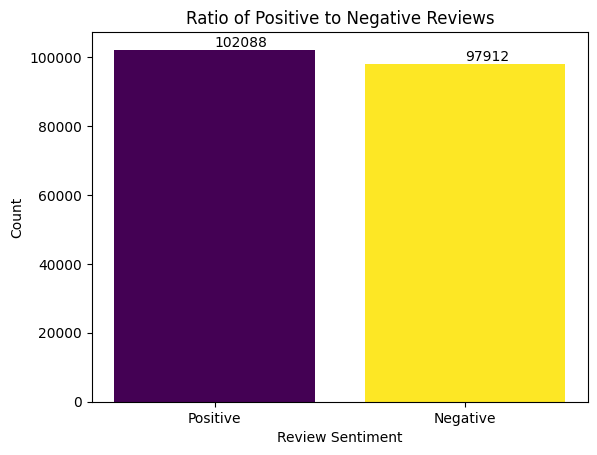

In [11]:
label_size = [df['is_positive'].sum(),len(df['is_positive'])-df['is_positive'].sum()]
bars = plt.bar(['Positive', 'Negative'], label_size, color=plt.cm.viridis(np.linspace(0, 5, 5)))
plt.xlabel('Review Sentiment')
plt.ylabel('Count')
plt.title('Ratio of Positive to Negative Reviews')

# Adding numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom') 
plt.savefig("models/data_ratio.png", dpi=300)
plt.show()

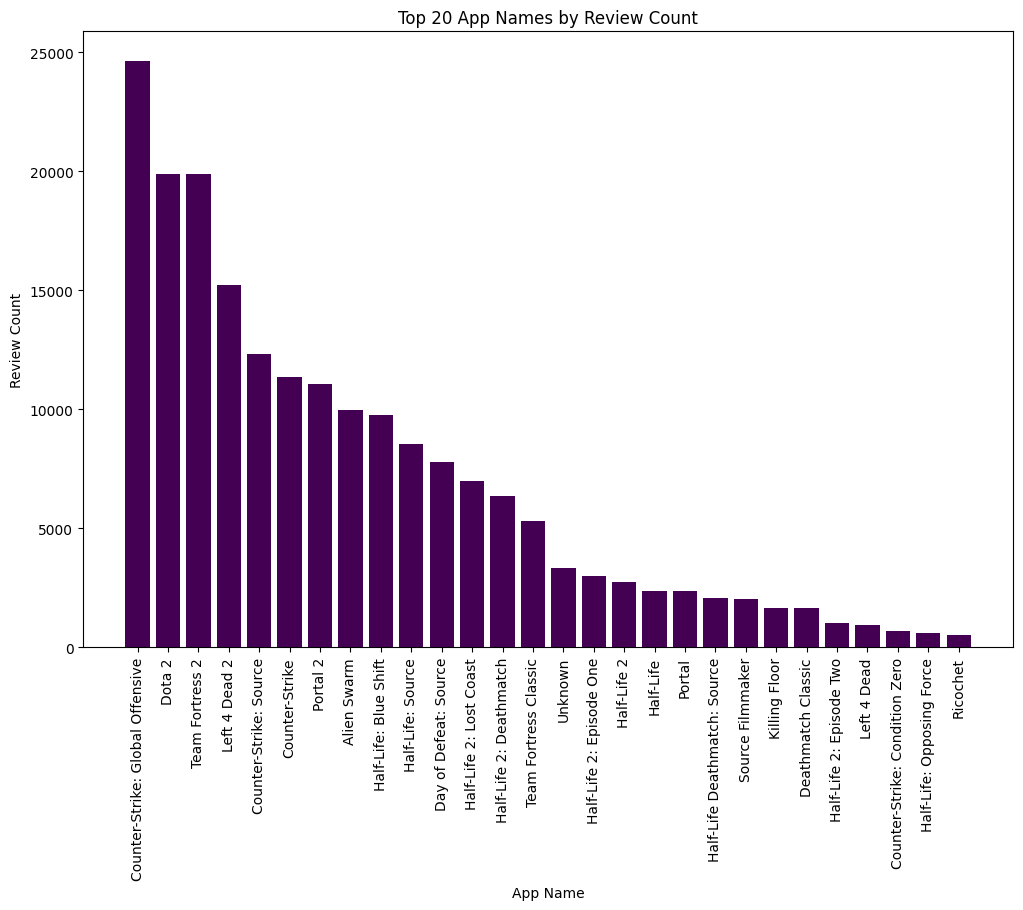

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge the DataFrames on 'app_id'
merged_df = df.merge(additional_data, left_on='app_id', right_on='appid')

# Get the top 20 app IDs by review count
top20_appid = df['app_id'].value_counts().head(50)

# Create a dictionary to map app_id to app name
app_id_to_name = dict(zip(additional_data['appid'], additional_data['name']))

# Get the names corresponding to the top 20 app IDs, handling missing keys
top20_names = [app_id_to_name.get(appid, 'Unknown') for appid in top20_appid.index]

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(top20_names, top20_appid.values, color=plt.cm.viridis_r(np.linspace(5, 1, 1)))
plt.xlabel('App Name')
plt.ylabel('Review Count')
plt.title('Top 20 App Names by Review Count')

plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.savefig("models/top20_reviewCount.png", dpi=300)
plt.show()

In [13]:
# Check the distribution of values in the 'is_positive' column
print(df['is_positive'].value_counts())

is_positive
1    102088
0     97912
Name: count, dtype: int64


In [14]:
# view the percentage distribution of target_class column
print(f"Percentage Distribution of target class {(df['is_positive'].value_counts()/n) * 100.0}")

Percentage Distribution of target class is_positive
1    50.751923
0    48.675870
Name: count, dtype: float64


## Preprocessing

In [15]:
#text preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) 
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = text.strip()
    return text

## Pipeline

In [16]:
# use to predict input
def pipeline(model, inputs: list, vectorizer):
    for text in inputs:
        preprocessed = preprocess_text(text)
        vectorized = vectorizer.transform([preprocessed])
        prediction = model.predict(vectorized)
        print(f"Input: {text}")
        if prediction[0] == 1:
            print("Output: Positive Sentiment")
        else:
            print("Output: Negative Sentiment")

## Display CLF report and CM

In [17]:
def plot_and_save_classification_report_and_confusion_matrix(y_true, y_pred, labels=None, path=None):
    # Ensure the path exists
    if path and not os.path.exists(path):
        os.makedirs(path)

    # Generate classification report
    report = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    # Plot classification report
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df.iloc[:-1, :3].T, annot=True, cmap='viridis')
    plt.savefig(os.path.join(path, 'classification_report.png'), dpi=300)  # Save the classification report figure
    plt.show()

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='viridis')
    plt.savefig(os.path.join(path, 'confusion_matrix.png'), dpi=300)  # Save the confusion matrix figure
    plt.show()

## Save & Load Model Func

In [18]:
import joblib
import os

def save_model_and_vectorizer(model, vectorizer, path, model_filename='model.pkl', vectorizer_filename='vectorizer.pkl'):
    # Ensure the path exists
    if not os.path.exists(path):
        os.makedirs(path)
    
    # Save the model
    joblib.dump(model, os.path.join(path, model_filename))
    print(f"Model saved to {os.path.join(path, model_filename)}")
    
    # Save the vectorizer
    joblib.dump(vectorizer, os.path.join(path, vectorizer_filename))
    print(f"Vectorizer saved to {os.path.join(path, vectorizer_filename)}")

def load_model_and_vectorizer(path, model_filename='model.pkl', vectorizer_filename='vectorizer.pkl'):
    # Load the model
    model = joblib.load(os.path.join(path, model_filename))
    print(f"Model loaded from {os.path.join(path, model_filename)}")
    
    # Load the vectorizer
    vectorizer = joblib.load(os.path.join(path, vectorizer_filename))
    print(f"Vectorizer loaded from {os.path.join(path, vectorizer_filename)}")
    
    return model, vectorizer

## Model Dataset

In [19]:
# Apply preprocessing to the content column
df['cleaned_content'] = df['content'].apply(preprocess_text)
df[50:60]

,id,app_id,content,author_id,is_positive,cleaned_content
160058,181450056,730,it's really good game to play with friends and...,76561199705673376,1,its really good game to play with friends and ...
185114,169080974,730,No anticheat),76561198010031619,0,no anticheat
154445,172263414,620,very fun puzzles i do enjoy\r\n,76561199122244954,1,very fun puzzles i do enjoy
141387,153962189,380,"Great game, and get EP2 when done!",76561199388718274,1,great game and get ep2 when done
161225,180316646,730,yea its good,76561199200505016,1,yea its good
81384,104904693,130,barney calhoun\n,76561198813301335,1,barney calhoun
21448,72870118,70,no,76561198060182327,0,no
173006,166779310,440,#fixtf2,76561198986233496,0,fixtf2
20362,153095813,70,my dog blew up,76561198858463407,0,my dog blew up
96795,131638112,320,pretty fun as a time waster,76561199253513778,1,pretty fun as a time waster


In [20]:
# Split the dataset into training and test sets
X = df['cleaned_content']  # Features (cleaned text)
y = df['is_positive']      # Labels (sentiment)

In [21]:
# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words for efficiency
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## MultinomialNB

In [23]:
# Modeling
model_mnb = MultinomialNB()
model_mnb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [24]:
# Evaluate the model
y_pred = model_mnb.predict(X_test_tfidf)

In [25]:
# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.8254
Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.78      0.81     19482
    Positive       0.81      0.87      0.84     20518

    accuracy                           0.83     40000
   macro avg       0.83      0.82      0.82     40000
weighted avg       0.83      0.83      0.82     40000



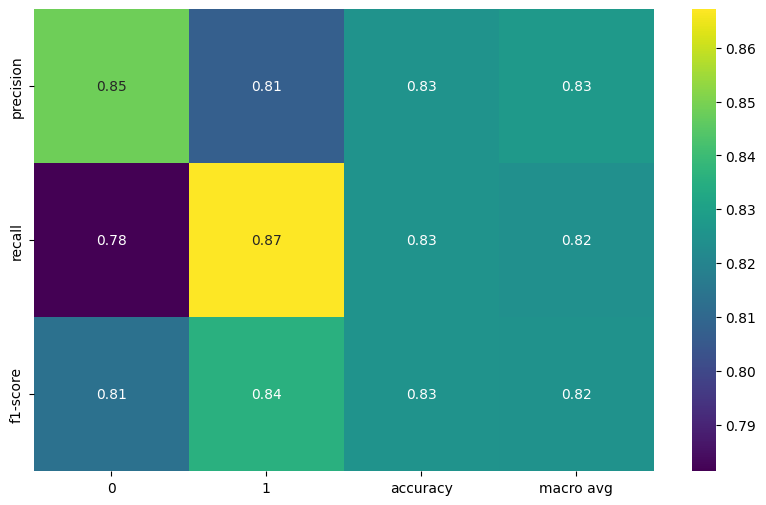

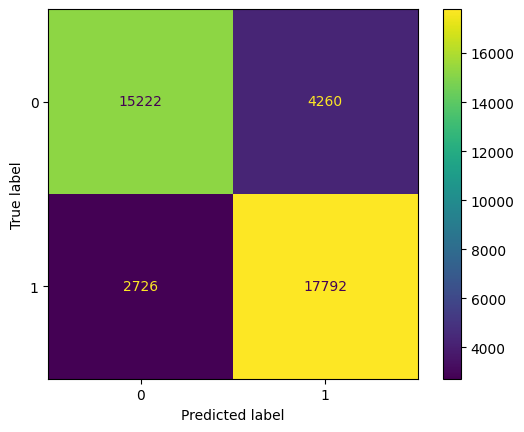

In [26]:
save_path = 'models/mnb'
plot_and_save_classification_report_and_confusion_matrix(y_test, y_pred, path=save_path)

In [27]:
save_model_and_vectorizer(model_mnb, vectorizer, path=save_path)

test_inputs = ["compare to the cs2 its good", "yeah. 1/10"]
test_model, vec = load_model_and_vectorizer(save_path)

pipeline(test_model, test_inputs, vectorizer=vec)

Model saved to models/mnb\model.pkl
Vectorizer saved to models/mnb\vectorizer.pkl
Model loaded from models/mnb\model.pkl
Vectorizer loaded from models/mnb\vectorizer.pkl
Input: compare to the cs2 its good
Output: Positive Sentiment
Input: yeah. 1/10
Output: Negative Sentiment


## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [29]:
y_pred = lr_model.predict(X_test_tfidf)

In [30]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.840375

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83     19482
           1       0.82      0.87      0.85     20518

    accuracy                           0.84     40000
   macro avg       0.84      0.84      0.84     40000
weighted avg       0.84      0.84      0.84     40000



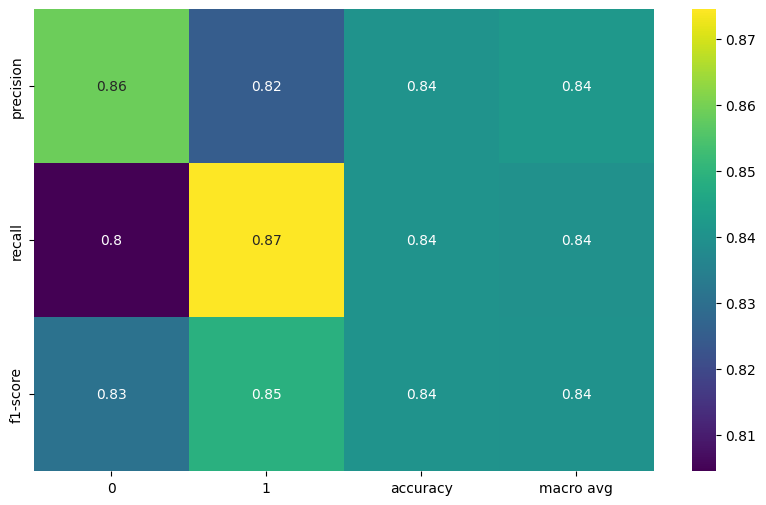

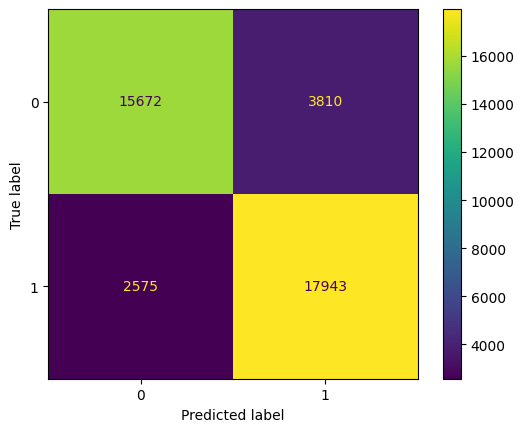

In [31]:
save_path = 'models/lr'
plot_and_save_classification_report_and_confusion_matrix(y_test, y_pred, path=save_path)

In [32]:
save_model_and_vectorizer(lr_model, vectorizer, path=save_path)

test_inputs = ["compare to the cs2 its good", "yeah. 1/10"]
test_model, vec = load_model_and_vectorizer(save_path)

pipeline(test_model, test_inputs, vectorizer=vec)

Model saved to models/lr\model.pkl
Vectorizer saved to models/lr\vectorizer.pkl
Model loaded from models/lr\model.pkl
Vectorizer loaded from models/lr\vectorizer.pkl
Input: compare to the cs2 its good
Output: Positive Sentiment
Input: yeah. 1/10
Output: Negative Sentiment


# 👇Ignore

## SVM

In [ ]:
from sklearn.decomposition import PCA

# Optional: Dimensionality reduction
pca = PCA(n_components=1000)
X_reduced = pca.fit_transform(X_train_tfidf)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, df['label'], test_size=0.3, random_state=42)

In [ ]:
from sklearn.svm import SVC

# Train a SVM  model
svm = SVC(kernel='linear', class_weight='balanced', verbose=True)
svm.fit(X_train_tfidf, y_train)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, verbose=1)

# Train the model
rf_model.fit(X_train_tfidf, y_train)

In [ ]:
# Make predictions
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))